In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#plt.style.use('seaborn')
plt.rc('legend', fontsize=20) # using a size in points
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

In [3]:
def plot_radar(r, ax=None, fill=True, figsize=(6,6), **kwargs):
    """plot a radar 
    Inputs: r, list like"""
    
    if ax==None:
        fig, ax = plt.subplots(1,1,figsize=figsize, subplot_kw={'projection': 'polar'} )
    
    r = list(r)
    N = len(r)
    r.append( r[0] )  # repeat first to close circle

    # get angle for each value
    theta = [n * 2 * np.pi / N  for n in range(N) ]
    theta.append( theta[0] )
    
    ax.plot(theta, r, **kwargs)
    if fill:
        ax.fill(theta, r, alpha=0.1)
    ax.set_xticks(theta[:-1], );
    #ax.set_xticklabels( ['v1', 'v2'] );
    ax.spines['polar'].set_visible(False)  # 不显示极坐标最外圈的圆
    return ax
    


In [4]:
def show_opsims(dbDir):
    '''Show available opsim databases in the provided directory.

    Args:
        dbDir(str): The path the database directory.
    '''

    dbDir = os.path.abspath(dbDir)
    db_list = glob.glob(dbDir+'/*.db')
    runNames = [os.path.splitext(os.path.basename(x))[0] for x in db_list]

    return runNames


In [5]:
def scale(arr, mode=0):
    """scale array by max or 0-1"""
    newarr = arr / arr.max()
    if mode==1:
        newarr = (arr - arr.min()) / (arr.max()-arr.min())
    return newarr

def get_family(df):
    """get family of opsim"""
    
    return df['db'].split('_')[0]



In [6]:
# name of opsims
dbpath = "/home/idies/workspace/lsst_cadence/FBS_1.5/"  # path to all opsim databases

runNames = show_opsims(dbpath)

runNames.sort()

In [7]:
# prepare proper motion dataframe from scores

#df_score_CI = pd.read_csv('./data/Score_CI.csv', skiprows=1, names=['score_CI'])
#df_score_LS = pd.read_csv('./data/Score_LS.csv', skiprows=1, names=['score_LS'])
#df_score_PMT = pd.read_csv('./data/Score_PMT.csv', skiprows=1, names=['score_PMT'])

df_score_CI = pd.read_csv('./data/Score_CI.csv', index_col=0)
df_score_LS = pd.read_csv('./data/Score_LS.csv', index_col=0)
df_score_PMT = pd.read_csv('./data/Score_PMT.csv', index_col=0)

df_properMotion = pd.DataFrame()

#df_properMotion['db'] = runNames
df_properMotion['db'] = df_score_CI.db
df_properMotion['FoM_CI'] = df_score_CI.fom
df_properMotion['FoM_LS'] = df_score_LS.fom
df_properMotion['FoM_PMT'] = df_score_PMT.fom

df_properMotion.sort_values(by='db', inplace=True)
df_properMotion.to_csv('./data/df_properMotion.csv', index=False)

In [9]:
filters = ['u', 'g', 'r', 'i', 'z', 'y']
cols_all = ['uu', 'ug', 'ur', 'ui', 'uz', 'uy', 'gg', 'gr', 'gi', 'gz', 'gy', 'rr', 'ri', 'rz', 'ry', 'ii', 'iz', 'iy', 'zz', 'zy', 'yy']

cols_same = [ 'uu',  'gg',  'rr',  'ii',  'zz',  'yy']

cols_diff = ['ug', 'ur', 'ui', 'uz', 'uy', 'gr', 'gi', 'gz', 'gy', 'ri', 'rz', 'ry', 'iz', 'iy', 'zy']

cols_pm = ['FoM_CI', 'FoM_LS', 'FoM_PMT']

In [10]:
df_tgaps = pd.read_csv('./data/tgapsFoM_v1.5.csv')
df_nfields = pd.read_csv('./data/Nfields_v1.5.csv')
df_nstar = pd.read_csv('./data/Nstars_v1.5.csv')
df_depth = pd.read_csv('./data/depthFoM_v1.5.csv', index_col=0)
df_properMotion = pd.read_csv('./data/df_properMotion.csv')


In [11]:
# normalize
for col in cols_all:
    # df_new[ col ] = np.tanh ( scale ( df_fom[col] ) * 3 )
    df_tgaps[col] = scale(df_tgaps[col])
    df_nfields[col] = scale(df_nfields[col])
    df_nstar[col] = scale(df_nstar[col])

for col in filters:
    df_depth[col] = scale(df_depth[col], mode=1)

for col in ['FoM_CI', 'FoM_LS', 'FoM_PMT']:
    df_properMotion[col] = scale(df_properMotion[col], mode=1)


df_tgaps['total'] = scale( np.sum(df_tgaps[ cols_all ], axis=1) )
df_nfields['total'] = scale( np.sum(df_nfields[ cols_all ], axis=1) )
df_nstar['total'] = scale( np.sum(df_nstar[ cols_all ], axis=1) )
df_depth['total'] = scale( np.sum(df_depth[ filters ], axis=1) )

df_properMotion['total'] = scale( np.sum(df_properMotion[ cols_pm ], axis=1) )


In [12]:
df_radar = df_properMotion.copy()

df_radar['FoM_tgaps'] = df_tgaps['total'] 
df_radar['FoM_EG'] = df_nfields['total']
df_radar['FoM_Gal'] = df_nstar['total']
df_radar['FoM_depth'] = df_depth['total']
df_radar.to_csv('./data/df_radar.csv', index=False)

In [362]:
#df_radar = pd.read_csv('./data/df_radar.csv')

In [17]:
df_radar.head()

,db,FoM_CI,FoM_LS,FoM_PMT,total,FoM_tgaps,FoM_EG,FoM_Gal,FoM_depth
0,agnddf_v1.5_10yrs,0.555133,NaN,0.583599,0.692068,0.443376,0.564762,0.610002,0.946349
1,alt_dust_v1.5_10yrs,0.768061,NaN,0.523405,0.784893,0.603965,0.554701,0.307607,0.896448
2,alt_roll_mod2_dust_sdf_0.20_v1.5_10yrs,0.768061,NaN,0.448807,0.739556,0.679559,0.644424,0.371077,0.853695
3,baseline_2snaps_v1.5_10yrs,0.577947,NaN,0.845955,0.865381,0.409759,0.330473,0.396784,0.908796
4,baseline_v1.5_10yrs,0.566540,NaN,0.663306,0.747443,0.477122,0.636859,0.673557,0.944149


In [300]:
#df_radar['FoM_LS'] = df_radar['FoM_LS']*3


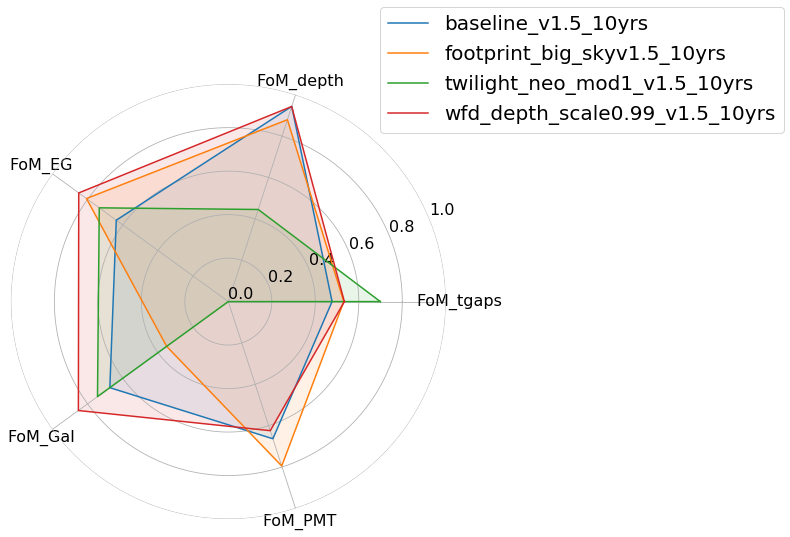

In [19]:
dbnames = [ 'baseline_v1.5_10yrs', 'footprint_big_skyv1.5_10yrs',
           'twilight_neo_mod1_v1.5_10yrs',
           'wfd_depth_scale0.99_v1.5_10yrs']

FoMvars = ['FoM_tgaps', 'FoM_depth', 'FoM_EG', 'FoM_Gal', 'FoM_PMT']


fig, ax = plt.subplots(1,1,figsize=(8,8), subplot_kw={'projection': 'polar'} )

for dbname in dbnames:
    r = df_radar[ df_radar.db==dbname ][FoMvars].values.flatten()
    
    ax = plot_radar(r=r, label=dbname, fill=True, ax=ax)

ax.set_xticklabels(FoMvars, );
ax.set_yticks([0, .2, .4, .6, .8, 1])
#ax.set_rlabel_position(0)
plt.legend(loc='upper right', bbox_to_anchor=(1.8, 1.2))